In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import glob
for f in glob.glob("./input/*"):
    print(f)

./input\gender_submission.csv
./input\test.csv
./input\train.csv


In [3]:
df=pd.read_csv("./input/train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# データ処理の方針を考える
---
NameとTicket項はdropするとして、Fareは客席の位置として重要であると思われる。欠損値の多いCabinも逆に言えば位置が分かっている乗客がいたということになるので、欠損値を0、それ以外を1で二値分類する。
Ageの欠損値はrandomで埋める。

In [5]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [7]:
df["Sex"]=df["Sex"].replace(["male", "female"], [0, 1])
df["Embarked"]=df["Embarked"].replace(["S", "Q", "C"], [0, 1, 2])

In [8]:
import random

# まずはNaNをfillna()関数で埋める
df["Age"]=df["Age"].fillna(random.random()*100)
df["Cabin"]=df["Cabin"].fillna(0)

# pd.to_numericでエラーを指定することで数字に変換できないものをNaNにした後、1で埋める。
df["Cabin"]=pd.to_numeric(df["Cabin"], errors="coeres")
df["Cabin"]=df["Cabin"].fillna(1)


In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0,2.0
2,1,3,1,26.000000,0,0,7.9250,0.0,0.0
3,1,1,1,35.000000,1,0,53.1000,1.0,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0,0.0
5,0,3,0,8.051529,0,0,8.4583,0.0,1.0
6,0,1,0,54.000000,0,0,51.8625,1.0,0.0
7,0,3,0,2.000000,3,1,21.0750,0.0,0.0
8,1,3,1,27.000000,0,2,11.1333,0.0,0.0
9,1,2,1,14.000000,1,0,30.0708,0.0,2.0


In [10]:
corrmat=df.corr()
corrmat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.007103,-0.035322,0.081629,0.257307,0.316912,0.169718
Pclass,-0.338481,1.000000,-0.131900,-0.371671,0.083081,0.018443,-0.549500,-0.725541,-0.164681
Sex,0.543351,-0.131900,1.000000,-0.039521,0.114631,0.245489,0.182333,0.140391,0.110320
Age,-0.007103,-0.371671,-0.039521,1.000000,-0.204228,-0.080537,0.132004,0.273921,-0.060431
SibSp,-0.035322,0.083081,0.114631,-0.204228,1.000000,0.414838,0.159651,-0.040460,-0.068900
Parch,0.081629,0.018443,0.245489,-0.080537,0.414838,1.000000,0.216225,0.036987,-0.040449
Fare,0.257307,-0.549500,0.182333,0.132004,0.159651,0.216225,1.000000,0.482075,0.226311
Cabin,0.316912,-0.725541,0.140391,0.273921,-0.040460,0.036987,0.482075,1.000000,0.163298
Embarked,0.169718,-0.164681,0.110320,-0.060431,-0.068900,-0.040449,0.226311,0.163298,1.000000


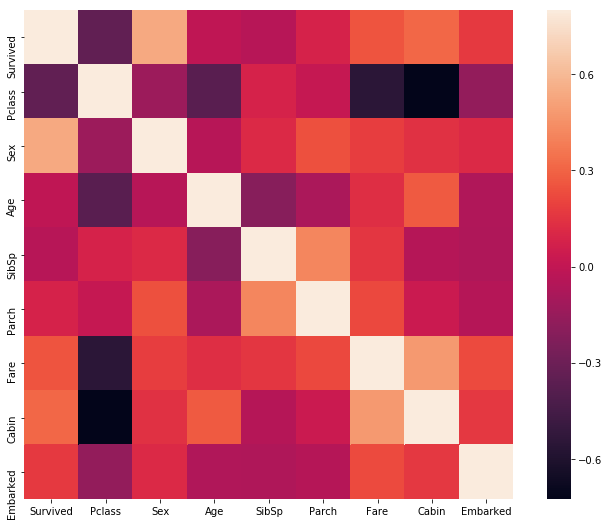

In [11]:
plt.figure(figsize=(12,9))
plt.subplot()
sns.heatmap(corrmat, vmax=.8, square=True)

## kerasによる学習段階

In [12]:
train_labels = df['Survived'].values

train_features = df
train_features.drop('Survived', axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

In [13]:
import keras
import tensorflow as tf

model=keras.Sequential([
        keras.layers.Dense(10, activation=tf.nn.relu, input_dim=8),
        keras.layers.Dense(2, activation=tf.nn.softmax),
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),\
              loss="sparse_categorical_crossentropy",\
             metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
891/891 [==============================] - 0s 298us/step - loss: 1.6373 - acc: 0.3412
Epoch 2/50
891/891 [==============================] - 0s 30us/step - loss: 0.9210 - acc: 0.4063
Epoch 3/50
891/891 [==============================] - 0s 27us/step - loss: 0.7373 - acc: 0.6094
Epoch 4/50
891/891 [==============================] - 0s 29us/step - loss: 0.7088 - acc: 0.6195
Epoch 5/50
891/891 [==============================] - 0s 27us/step - loss: 0.6891 - acc: 0.6251
Epoch 6/50
891/891 [==============================] - 0s 29us/step - loss: 0.6750 - acc: 0.6319
Epoch 7/50
891/891 [==============================] - 0s 29us/step - loss: 0.6588 - acc: 0.6521
Epoch 8/50
891/891 [==============================] - 0s 30us/step - loss: 0.6479 - acc: 0.6622
Epoch 9/50
891/891 [==============================] - 0s 27us/step - loss: 0.6380 - acc: 0.6869
Epoch 10/50
891/891 [==============================] - 0s 29us/step - loss: 0.6271 - ac

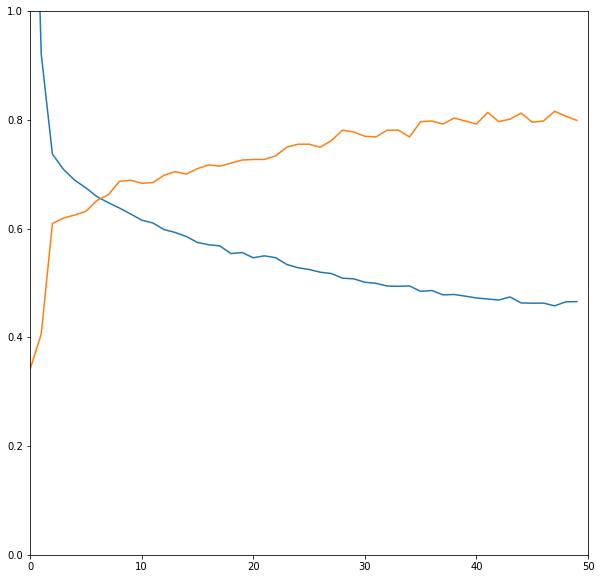

In [15]:
epochs=50
fit=model.fit(train_features, train_labels, epochs=epochs)

plt.figure(figsize=(10,10))
plt.xlim(0,epochs)
plt.ylim(0, 1)
plt.plot(fit.history['loss'], label="loss of training")
plt.plot(fit.history['acc'], label="acc of training")

## テストデータの予測

In [16]:
df_test=pd.read_csv("./input/test.csv")

In [17]:
df_test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

df_test["Sex"]=df_test["Sex"].replace(["male", "female"], [0, 1])
df_test["Embarked"]=df_test["Embarked"].replace(["S", "Q", "C"], [0, 1, 2])

# まずはNaNをfillna()関数で埋める
df_test["Age"]=df_test["Age"].fillna(random.random()*100)
df_test["Cabin"]=df_test["Cabin"].fillna(0)

# pd.to_numericでエラーを指定することで数字に変換できないものをNaNにした後、1で埋める。
df_test["Cabin"]=pd.to_numeric(df["Cabin"], errors="coeres")
df_test["Cabin"]=df["Cabin"].fillna(1)

df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.500000,0,0,7.8292,0.0,1
1,3,1,47.000000,1,0,7.0000,1.0,0
2,2,0,62.000000,0,0,9.6875,0.0,1
3,3,0,27.000000,0,0,8.6625,1.0,0
4,3,1,22.000000,1,1,12.2875,0.0,0
5,3,0,14.000000,0,0,9.2250,0.0,0
6,3,1,30.000000,0,0,7.6292,1.0,1
7,2,0,26.000000,1,1,29.0000,0.0,0
8,3,1,18.000000,0,0,7.2292,0.0,2
9,3,0,21.000000,2,0,24.1500,0.0,0


In [18]:
test_features = df_test.values.astype(np.int64)

In [19]:
survived_p=model.predict(test_features)
print(survived_p)

[[0.85817707 0.14182287]
 [0.53089446 0.46910554]
 [0.844875   0.1551251 ]
 [0.7987555  0.2012445 ]
 [0.62003255 0.37996736]
 [0.8520416  0.14795835]
 [0.3731626  0.62683743]
 [0.87261474 0.12738527]
 [0.4208806  0.5791194 ]
 [0.9079104  0.09208962]
 [0.77036643 0.2296336 ]
 [0.7198701  0.28012988]
 [0.37515098 0.624849  ]
 [0.9014513  0.09854874]
 [0.46268427 0.53731567]
 [0.41042078 0.5895792 ]
 [0.817798   0.182202  ]
 [0.8119601  0.1880399 ]
 [0.6033863  0.39661372]
 [0.49770322 0.5022968 ]
 [0.7894388  0.21056123]
 [0.79247487 0.2075251 ]
 [0.33429405 0.665706  ]
 [0.5710996  0.42890045]
 [0.29198375 0.7080163 ]
 [0.9170397  0.0829603 ]
 [0.2840976  0.7159023 ]
 [0.7208756  0.27912444]
 [0.8014964  0.19850361]
 [0.8606671  0.13933292]
 [0.8873755  0.11262452]
 [0.8144275  0.18557248]
 [0.67509186 0.32490814]
 [0.6172895  0.38271052]
 [0.7393591  0.2606409 ]
 [0.80664504 0.19335501]
 [0.4960706  0.5039294 ]
 [0.52188736 0.47811264]
 [0.8672649  0.13273503]
 [0.8230667  0.17693323]


In [20]:
test_survived=np.array([])
for i in range(len(df_test)):
    test_survived=np.append(test_survived, np.argmax(survived_p[i]))
    
test_survived=test_survived.astype(np.int64)
print(test_survived)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [21]:
type(test_survived[0])

numpy.int64

## 出力できる形式に変更

In [22]:
df_out = pd.read_csv("./input/test.csv")
df_out["Survived"] = test_survived

In [23]:
df_out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [25]:
df_out[["PassengerId","Survived"]].to_csv("./output/submission.csv",index=False)